In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_hdf('./dataset1.h5')

In [3]:
# Both of this versions only discard the trayectories if they are parallel
# or the same trayectory. 

# Should it discard the case when trayectories are perpendicular?


# This version uses the analytical solution for the 3 equation problem
# A bit slower than getPoint
def my_version(r1, r2, v1, v2):
    v3 = np.cross(v1, v2)
    v2_cross_v3 = np.cross(v2, v3)
    det = np.dot(v1, -v2_cross_v3)
    if np.abs(det) < 1.0e-6:
        return False, [0, 0, 0]
    delta_r = r1 - r2
    v1_cross_v3 = np.cross(v1, v3)
    xpoca1 = r1 + v1 * np.dot(delta_r, v2_cross_v3)/det
    xpoca2 = r2 + v2 * np.dot(delta_r, v1_cross_v3)/det
    v = 0.5 * (xpoca1 + xpoca2)
    return True, v

# This version solves the 3 equation problem by inverting the matrix
# A bit slower than the others
def matrix_inv(r1, r2, v1, v2):

    v3 = np.cross(v1, v2)
    det = np.dot(v1, np.cross(v3, v2))
    if np.abs(det) < 1.0e-6:
        return False, [0, 0, 0]
    inv_mat = np.linalg.inv([v1, -v2, v3])
    solutions = (r2 - r1) @ inv_mat # @ is matrix multiplication
    xpoca1 = r1 + v1 * solutions[0]
    xpoca2 = r2 + v2 * solutions[1]
    v = 0.5 * (xpoca1 + xpoca2)
    return True, v

r1 = np.array([1, 3, 0])
r2 = np.array([1, 0, 0])
v1 = np.array([0, 0, 10])
v2 = np.array([1, 2, 1])

print(my_version(r1, r2, v1, v2))

(True, array([1.6, 2.7, 1.2]))


In [8]:
#Data structure for selection and plotting

binInfo = dict()
# binInfo['thresholdx'] = 0.05
# binInfo['thresholdy'] = 0.05
# binInfo['xynbinx'] = 160
# binInfo['xynbiny'] = 160
# binInfo['xznbinx'] = 160
# binInfo['xznbinz'] = 160
# binInfo['yznbiny'] = 160
# binInfo['yznbinz'] = 160
# binInfo['limitX'] = [-30, 30]
# binInfo['limitY'] = [-30, 30]
# binInfo['limitZ'] = [-5, 5]

# This ones are for the 3d plot
binInfo = dict()
binInfo['thresholdx'] = 0.05
binInfo['thresholdy'] = 0.05
binInfo['xynbinx'] = 160
binInfo['xynbiny'] = 160
binInfo['xznbinx'] = 160
binInfo['xznbinz'] = 160
binInfo['yznbiny'] = 160
binInfo['yznbinz'] = 160
binInfo['limitX'] = [-8, 8]
binInfo['limitY'] = [-3, 3]
binInfo['limitZ'] = [-3, 3]

In [10]:
ax = []
ay = []
az = []

x = []
y = []
z = []

# loop through the rows using iterrows()
for index, row in dataset.iterrows():
    #if index > 100:
    #    break
    r1 = np.asarray([row['x1'], row['y1'], row['z1']])
    r2 = np.asarray([row['x2'], row['y2'], row['z2']])
    v1 = np.asarray([row['vx1'], row['vy1'], row['vz1']])
    v2 = np.asarray([row['vx2'], row['vy2'], row['vz2']])
    dtx = row['dthetax']
    dty = row['dthetay']

    valid = False
    ###Apply here a simple angular selection
    if abs(dtx) > binInfo['thresholdx'] or abs(dty) > binInfo['thresholdy']:
        valid, v = my_version(r1, r2, v1, v2)
        if not valid:
            continue
        if v[0] < binInfo['limitX'][0] or v[0] > binInfo['limitX'][1]:
            continue
        if v[1] < binInfo['limitY'][0] or v[1] > binInfo['limitY'][1]:
            continue
        if v[2] < binInfo['limitZ'][0] or v[2] > binInfo['limitZ'][1]:
            continue
        ax.append(v[0])
        ay.append(v[1])
        az.append(v[2])
    else:
        continue
    x = np.asarray(ax)
    y = np.asarray(ay)
    z = np.asarray(az)
print(len(x))

7267


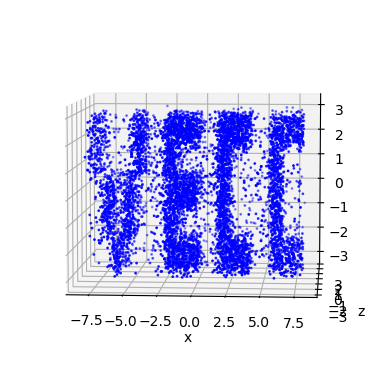

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax = fig.add_subplot()

ax.scatter(x, z, y, c="blue", s=1)
ax.set_xlabel("x")
ax.set_ylabel("z")
ax.view_init(elev=6, azim=-86)
plt.show()

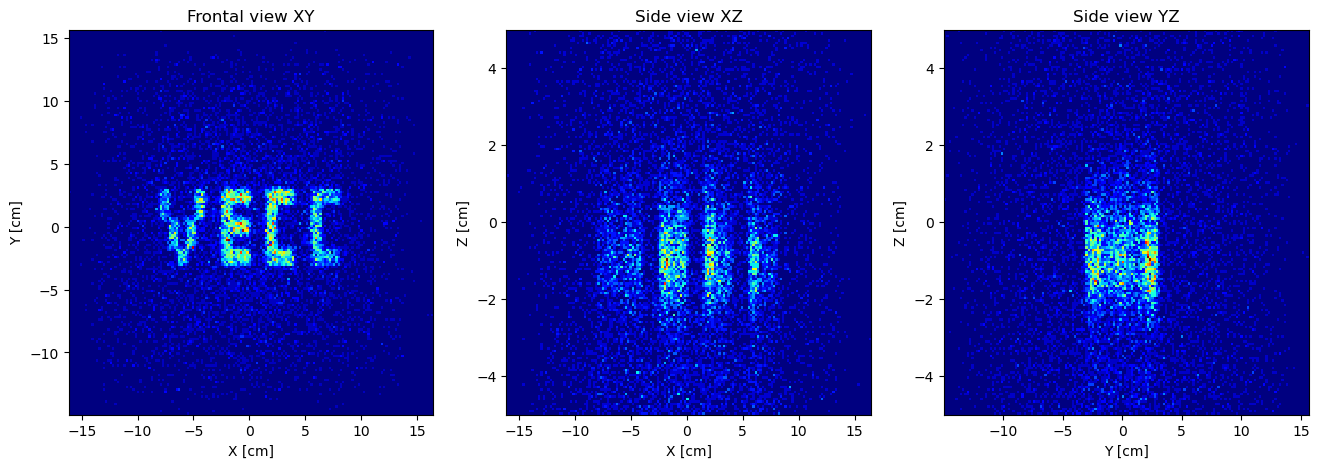

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
ax[0].set_title('Frontal view XY')
ax[1].set_title('Side view XZ')
ax[2].set_title('Side view YZ')
ax[0].set_xlabel('X [cm]')
ax[0].set_ylabel('Y [cm]')
ax[1].set_xlabel('X [cm]')
ax[1].set_ylabel('Z [cm]')
ax[2].set_xlabel('Y [cm]')
ax[2].set_ylabel('Z [cm]')

ax[0].hist2d(x, y, bins=(binInfo['xynbinx'], binInfo['xynbiny']), cmap=plt.cm.jet)
ax[1].hist2d(x, z, bins=(binInfo['xznbinx'], binInfo['xznbinz']), cmap=plt.cm.jet)
ax[2].hist2d(y, z, bins=(binInfo['yznbiny'], binInfo['yznbinz']), cmap=plt.cm.jet)
plt.show()